<a href="https://colab.research.google.com/github/nishitawaghela/ML-Mini-Project/blob/main/ML_Mini_Projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM STATEMENT: to predict length of stay of patients in a hospital , find which is the best model for predicting , compare them using suitable metrics and visualisation

import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data preprocessing

In [ ]:
df=pd.read_csv('/content/LengthOfStay.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [ ]:
df.head(10)

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4
5,6,11/27/2012,3,M,0,0,0,0,0,0,...,120.265259,11.0,0.884663,27.875940,83,6.1,1,12/3/2012,B,6
6,7,9/27/2012,4,F,0,0,0,0,0,0,...,124.335692,6.0,0.923083,29.928817,68,6.5,4,10/3/2012,A,6
7,8,6/4/2012,0,F,0,0,0,0,0,1,...,152.265862,11.0,0.768106,32.999171,63,6.0,3,6/7/2012,E,3
8,9,7/5/2012,0,F,0,0,0,0,1,0,...,100.283199,12.0,1.178786,28.802682,69,6.5,1,7/8/2012,E,3
9,10,9/1/2012,0,F,0,0,0,0,0,0,...,167.066115,10.0,1.585072,32.503727,65,6.5,0,9/3/2012,E,2


In [ ]:
df.drop(columns=['eid'],inplace=True)

In [ ]:
df.isnull().sum()

,0
vdate,0
rcount,0
gender,0
dialysisrenalendstage,0
asthma,0
irondef,0
pneum,0
substancedependence,0
psychologicaldisordermajor,0
depress,0


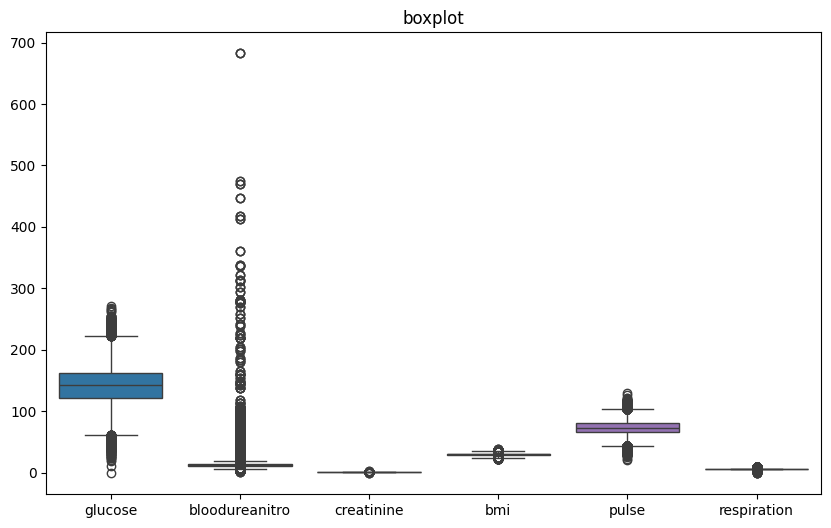

In [ ]:
columns = ['glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns])
plt.title('boxplot')
plt.show()

In [ ]:
label_encoders = {}
for col in ['gender','rcount','facid']:
    label = LabelEncoder()
    df[col] = label.fit_transform(df[col])
    label_encoders[col] = label

train test split

In [ ]:
X = df.drop(columns=['lengthofstay','vdate','discharged'])
y = df['lengthofstay']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(random_state=42)

setting up hyperparameter

In [ ]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2]
}

grid search cv

In [ ]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("best hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
best hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


evaluate random forest

In [ ]:
y_pred_tuned= best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_tuned)
print(f"Mean Squared Error (MSE): {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 0.72
Root Mean Squared Error (RMSE): 0.85


feature imp plot

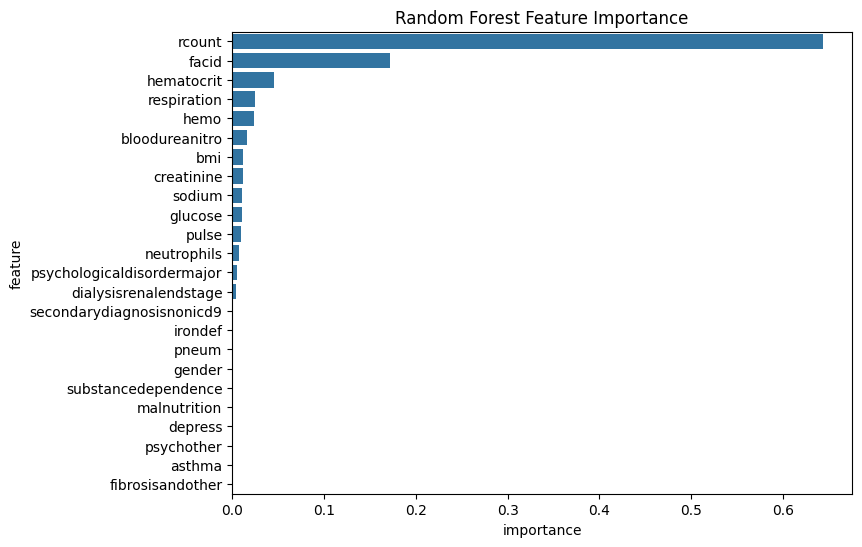

In [ ]:
imp_feat = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=imp_feat, x='importance', y='feature')
plt.title('Random Forest Feature Importance')
plt.show()

using linear regression

In [ ]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
print(f"linear regression MSE: {mse2:.3f}")
rmse2=np.sqrt(mse2)
print(f"linear regression RMSE: {rmse2:.3f}")

linear regression MSE: 1.315
linear regression RMSE: 1.147


diff b/w both models

In [ ]:
metrics = ['MSE', 'RMSE']
rf  = [mse,  rmse]
lr  = [mse2, rmse2]
x     = np.arange(len(metrics))
width = 0.35

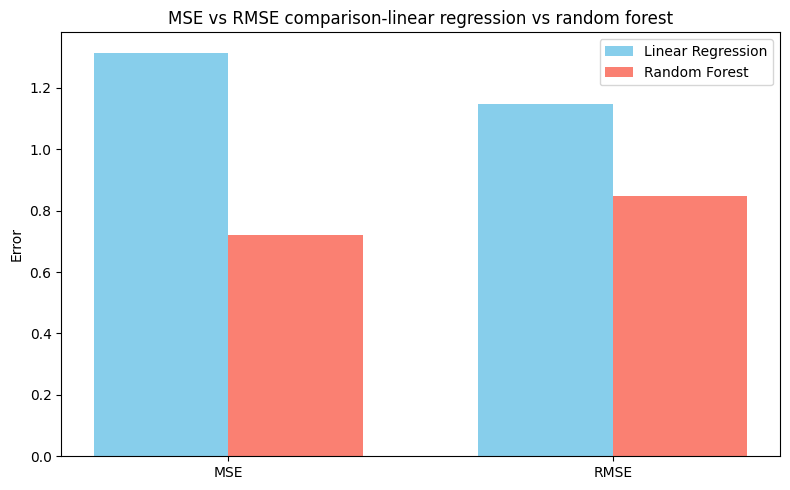

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(x - width/2, lr, width, label='Linear Regression', color='skyblue')
plt.bar(x + width/2, rf, width, label='Random Forest',    color='salmon')
plt.xticks(x, metrics)
plt.ylabel('Error')
plt.title('MSE vs RMSE comparison-linear regression vs random forest')
plt.legend()
plt.tight_layout()
plt.show()

r2 score

In [ ]:
from sklearn.metrics import r2_score
model.fit(X_train, y_train)
y_pred_base = model.predict(X_test)
r2_base = r2_score(y_test, y_pred_base)
print(f"R2 score without tuning: {r2_base:.3f}")
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"R2 score with tuning: {r2_tuned:.3f}")

R2 score without tuning: 0.927
R2 score with tuning: 0.869


cross val

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"cross validation MSE: {-cv_scores.mean():.3f}")

cross validation MSE: 0.754


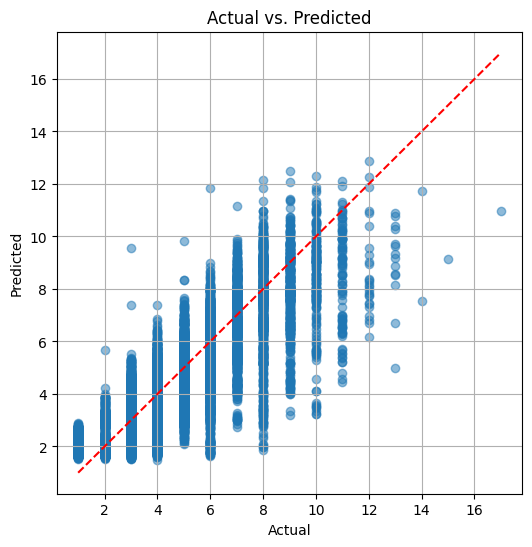

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred2, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()

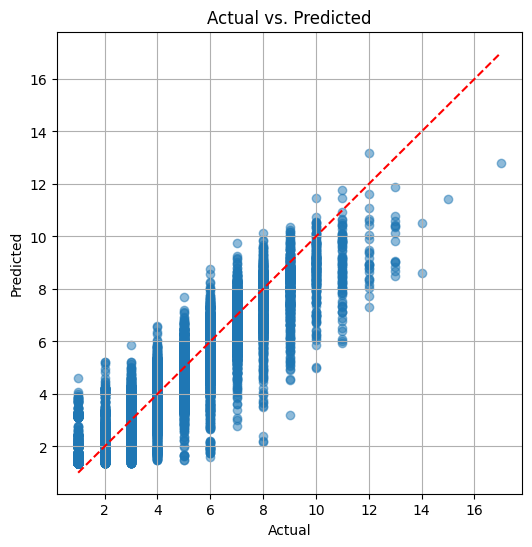

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()

re-training using only top features for random forest

In [ ]:
top_features = imp_feat['feature'].head(14).values
print("Top features selected:", top_features)

Top features selected: ['rcount' 'facid' 'hematocrit' 'respiration' 'hemo' 'bloodureanitro' 'bmi'
 'creatinine' 'sodium' 'glucose' 'pulse' 'neutrophils'
 'psychologicaldisordermajor' 'dialysisrenalendstage']


In [ ]:
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [ ]:
rf_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top.fit(X_train_top, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_top = rf_top.predict(X_test_top)

In [ ]:
mse_top = mean_squared_error(y_test, y_pred_top)
rmse_top = mse_top ** 0.5
r2_top = r2_score(y_test, y_pred_top)
print(f"R2 Score with top features: {r2_top:.3f}")
print(f"MSE with top features: {mse_top:.3f}")
print(f"RMSE with top features: {rmse_top:.3f}")

R2 Score with top features: 0.919
MSE with top features: 0.445
RMSE with top features: 0.667


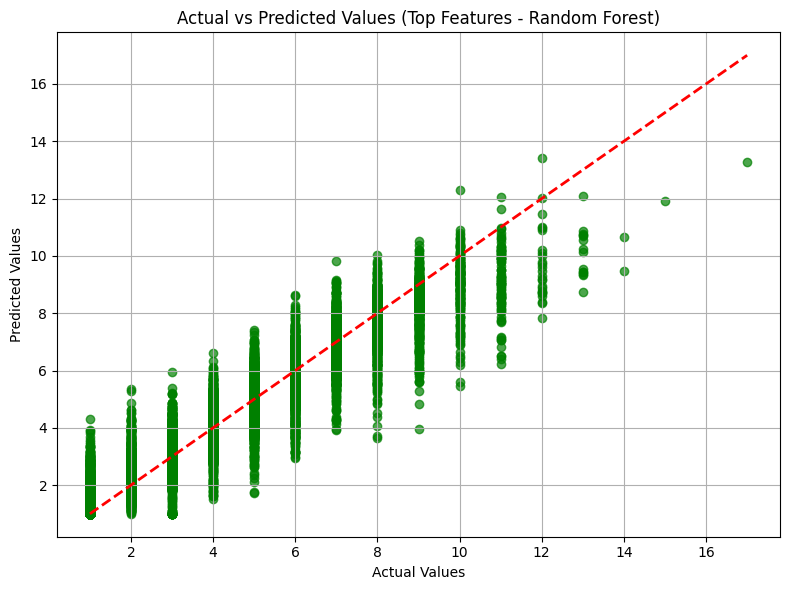

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_top, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Top Features - Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()

retrain using normalization (for linear regression)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_lr_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
mse_scaled = mean_squared_error(y_test, y_pred_lr_scaled)
rmse_scaled = mse_scaled ** 0.5
r2_scaled = r2_score(y_test, y_pred_lr_scaled)
print(f"Linear Regression with Normalization:")
print(f"R²: {r2_scaled:.3f}")
print(f"MSE: {mse_scaled:.3f}")
print(f"RMSE: {rmse_scaled:.3f}")

Linear Regression with Normalization:
R²: 0.760
MSE: 1.315
RMSE: 1.147


In [ ]:
r2_without_normalization = r2_score(y_test, y_pred2)
print(f"R² without normalization: {r2_without_normalization:.3f}")

R² without normalization: 0.760


using polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

In [ ]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
r2_poly = r2_score(y_test, lr_poly.predict(X_test_poly))
print(f"R² with Polynomial Features: {r2_poly:.3f}")

R² with Polynomial Features: 0.870


mse and rmse for untuned random forest model

In [ ]:
y_pred_base = model.predict(X_test)
mse_rf_base = mean_squared_error(y_test, y_pred_base)
rmse_rf_base = mse_rf_base ** 0.5
print(f"MSE (Random Forest without tuning): {mse_rf_base:.3f}")
print(f"RMSE (Random Forest without tuning): {rmse_rf_base:.3f}")

MSE (Random Forest without tuning): 0.398
RMSE (Random Forest without tuning): 0.631


In [ ]:
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=3, scoring='r2')
cv_r2_mean = cv_r2_scores.mean()
print(f"Cross Validation R2 Score (Random Forest tuned): {cv_r2_mean:.3f}")

Cross Validation R2 Score (Random Forest tuned): 0.865


In [ ]:
mse_poly = mean_squared_error(y_test, lr_poly.predict(X_test_poly))
rmse_poly = mse_poly ** 0.5
print(f"MSE (Polynomial Regression): {mse_poly:.3f}")
print(f"RMSE (Polynomial Regression): {rmse_poly:.3f}")

MSE (Polynomial Regression): 0.715
RMSE (Polynomial Regression): 0.846
